In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_true=np.pi/4 # defining root as global var 
machine_eps = np.finfo(float).eps

def f(x):
    return (1/np.sqrt(2)) - np.cos(x)

def f_prime(x):
    return np.sin(x)

In [7]:
#bisection method
errors_bisection = [] #to save the errors with each iteration
# errors_bisection1 = [] # to the approximate errors as |lower-upper|

def bisection_method(lower, upper, tol=machine_eps, max_iter=100):
    if f(upper) * f(lower) > 0: # root existence condition
        raise ValueError("f(a) and f(b) must have opposite signs.")
    
    print(f"{'Iteration':<10}{'Current Root':<20}{'Error':<20}")
    print("-" * 50)
    
    iterations = 0
    while abs(upper - lower) > tol and iterations < max_iter:
        mid = (upper + lower) / 2
        error = abs(upper-lower)
        errors_bisection.append(abs(x_true - mid))
        # errors_bisection1.append(error)
        
        print(f"{iterations+1:<10}{mid:<20.10f}{error:<20.10e}")
        
        
        if f(mid) == 0: # exact root found
            break
        elif f(lower) * f(mid) < 0:
            upper = mid
        else:
            lower = mid
        iterations += 1

    return mid, iterations

# Run the verbose bisection method
bisection_method(0, 2)

Iteration Current Root        Error               
--------------------------------------------------
1         1.0000000000        2.0000000000e+00    
2         0.5000000000        1.0000000000e+00    
3         0.7500000000        5.0000000000e-01    
4         0.8750000000        2.5000000000e-01    
5         0.8125000000        1.2500000000e-01    
6         0.7812500000        6.2500000000e-02    
7         0.7968750000        3.1250000000e-02    
8         0.7890625000        1.5625000000e-02    
9         0.7851562500        7.8125000000e-03    
10        0.7871093750        3.9062500000e-03    
11        0.7861328125        1.9531250000e-03    
12        0.7856445312        9.7656250000e-04    
13        0.7854003906        4.8828125000e-04    
14        0.7852783203        2.4414062500e-04    
15        0.7853393555        1.2207031250e-04    
16        0.7853698730        6.1035156250e-05    
17        0.7853851318        3.0517578125e-05    
18        0.7853927612        1

(0.7853981633974485, 53)

In [8]:
error_nr = []

def newton_raphson(x0, tol=machine_eps, max_iter=100):
    
    print(f"{'Iteration':<10}{'Current Root':<20}{'Error':<20}")
    print("-" * 50)
    
    x = x0 # initial guess
    iterations = 0
    while abs(f(x)) > tol and iterations < max_iter:
        x = x - f(x) / f_prime(x)
        error = abs(x_true - x)
        error_nr.append(error)
        
        print(f"{iterations+1:<10}{x:<20.10f}{error:<20.10e}")
        
        
        iterations += 1
    return x, iterations

newton_raphson(x0=0.2)

Iteration Current Root        Error               
--------------------------------------------------
1         1.5739402834        7.8854212000e-01    
2         0.8636860405        7.8287877152e-02    
3         0.7880954349        2.6972715091e-03    
4         0.7854017847        3.6213345186e-06    
5         0.7853981634        6.5570882057e-12    
6         0.7853981634        1.1102230246e-16    


(0.7853981633974484, 6)

In [9]:
# Secant Method
error_secant = []

# start values taken as x0 and x1
def secant_method(x0, x1, tol=machine_eps, max_iter=100):
    print(f"{'Iteration':<10}{'Current Root':<20}{'Error':<20}")
    print("-" * 50)
    
    iterations = 0
    while abs(x1 - x0) > tol and iterations < max_iter:
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0 = x1
        x1 = x2
        
        error = abs(x1- x_true)
        error_secant.append(error)
        
        print(f"{iterations+1:<10}{x1:<20.10f}{error:<20.10e}")
        
        iterations += 1
    return x1, iterations

secant_method(0, 2)

Iteration Current Root        Error               
--------------------------------------------------
1         0.4136480925        3.7175007091e-01    
2         0.6620621538        1.2333600960e-01    
3         0.8217936563        3.6395492936e-02    
4         0.7829812178        2.4169456175e-03    
5         0.7853554007        4.2762711792e-05    
6         0.7853982152        5.1783657140e-08    
7         0.7853981634        1.1071144002e-12    
8         0.7853981634        1.1102230246e-16    
9         0.7853981634        1.1102230246e-16    


(0.7853981633974484, 9)

C:\Users\soumy\AppData\Local\Temp\ipykernel_14208\987122964.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(range(1, len(errors_bisection) + 1), np.log10(errors_bisection), label='Bisection')
C:\Users\soumy\AppData\Local\Temp\ipykernel_14208\987122964.py:16: RuntimeWarning: divide by zero encountered in log10
  np.log10(errors_bisection)


array([ -0.66836657,  -0.54454883,  -1.45101927,  -1.04768309,
        -1.56700128,  -2.38214414,  -1.9401778 ,  -2.43600464,
        -3.61634008,  -2.76669628,  -3.13392005,  -3.60841596,
        -5.65223541,  -3.92138702,  -4.23056412,  -4.54836167,
        -4.88500354,  -5.267432  ,  -5.79929455,  -6.49501438,
        -6.19805092,  -6.80421588,  -7.08905378,  -7.42309513,
        -7.66043538,  -8.09981715,  -8.15773198,  -9.30447738,
        -8.4908992 ,  -8.8643591 ,  -9.36123546, -10.51733401,
        -9.69369258, -10.06535083, -10.5556087 , -11.89223345,
       -10.87712012, -11.22226036, -11.62776253, -12.26974441,
       -12.42928576, -13.08301683, -12.83931218, -13.50743174,
       -13.58910179, -14.57437853, -13.93755643, -14.35252978,
       -15.05149978, -15.05149978,         -inf, -15.35252978,
       -15.65355977])

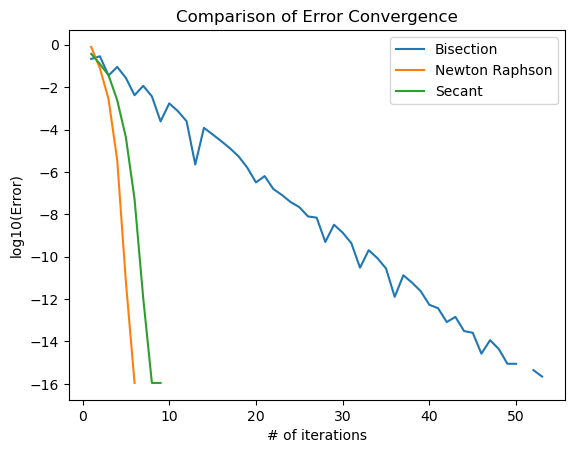

In [10]:
#Error plot for comparison

plt.plot(range(1, len(errors_bisection) + 1), np.log10(errors_bisection), label='Bisection')
# plt.plot(range(1, len(errors_bisection1) + 1), np.log10(errors_bisection1), label='Bisection Approximated Error')

plt.plot(range(1, len(error_nr) + 1), np.log10(error_nr), label='Newton Raphson')

plt.plot(range(1, len(error_secant) + 1), np.log10(error_secant), label='Secant')

plt.xlabel("# of iterations")
plt.ylabel("log10(Error)")
plt.title("Comparison of Error Convergence")

plt.legend()

np.log10(errors_bisection)